In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/petrol_price.csv")

In [4]:
df.head()

,date,Maharashtra,Haryana,Delhi,Gujarat,Karnataka,Telangana,Rajasthan,Punjab,West_bengal,Tamil Nadu,Uttar Pradesh,Madhya Pradesh,Kerala,Assam,Bihar
0,2017_Aug,74.56,64.98,65.40,67.09,66.39,69.24,67.93,70.32,68.56,67.71,68.63,71.99,69.06,68.03,69.78
1,2017_Dec,76.52,68.78,69.22,68.06,70.29,73.29,71.83,74.21,71.98,71.74,71.58,73.93,72.99,71.13,73.57
2,2017_Jul,74.30,62.68,63.09,64.77,64.24,67.02,65.77,67.93,66.14,65.46,66.53,69.62,66.93,65.83,65.93
3,2017_Jun,78.44,66.70,66.91,68.91,71.59,71.49,69.88,72.51,69.52,69.93,69.86,74.65,71.27,70.52,69.85
4,2017_May,77.46,67.84,68.09,71.15,73.01,72.68,71.12,73.41,70.68,71.17,70.74,75.87,72.43,71.41,71.16


In [5]:
df = df[['date', 'Maharashtra']]

In [6]:
df.head(3)

,date,Maharashtra
0,2017_Aug,74.56
1,2017_Dec,76.52
2,2017_Jul,74.30


In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y_%b')

In [8]:
df['date'] = df['date'].dt.strftime('%Y-%m')

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df = df.sort_values(by='date')

In [11]:
df.tail(15)

,date,Maharashtra
55,2021-09-01,107.39
54,2021-10-01,107.95
53,2021-11-01,115.50
46,2021-12-01,109.98
60,2022-01-01,109.98
59,2022-02-01,109.98
63,2022-03-01,109.98
56,2022-04-01,116.72
64,2022-05-01,120.51
62,2022-06-01,97.28


In [12]:
df.set_index('date', inplace=True, drop=True)
df.index = pd.to_datetime(df.index)

In [13]:
df

,Maharashtra
date,
2017-05-01,77.46
2017-06-01,78.44
2017-07-01,74.30
2017-08-01,74.56
2017-09-01,78.38
...,...
2022-07-01,111.35
2022-08-01,106.31
2022-09-01,106.31


In [14]:
avg_price = []
for i in range(2017, 2023):
  avg_price.append(df.loc[f'{i}'].mean())

In [15]:
avg_price

[Maharashtra    76.9725
 dtype: float64,
 Maharashtra    82.939167
 dtype: float64,
 Maharashtra    77.835
 dtype: float64,
 Maharashtra    82.861667
 dtype: float64,
 Maharashtra    102.404167
 dtype: float64,
 Maharashtra    109.185455
 dtype: float64]

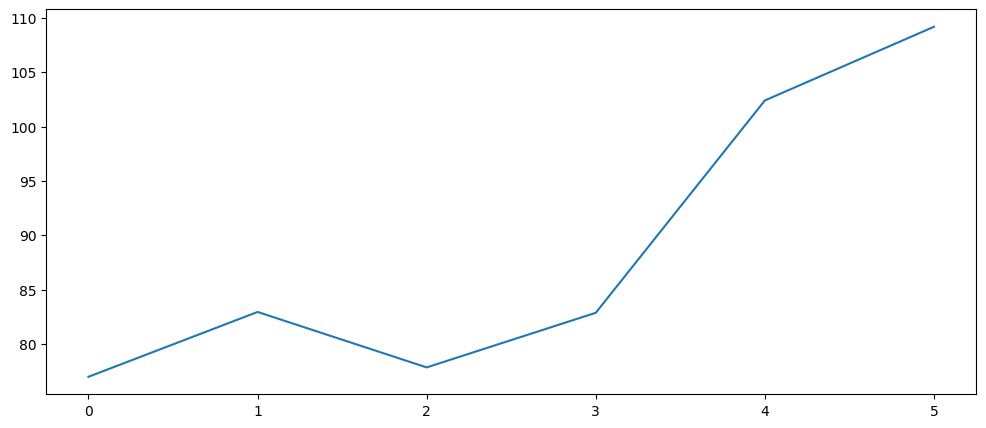

In [16]:
plt.figure(figsize=(12,5))
plt.plot(avg_price)
plt.show()

<Axes: xlabel='date'>

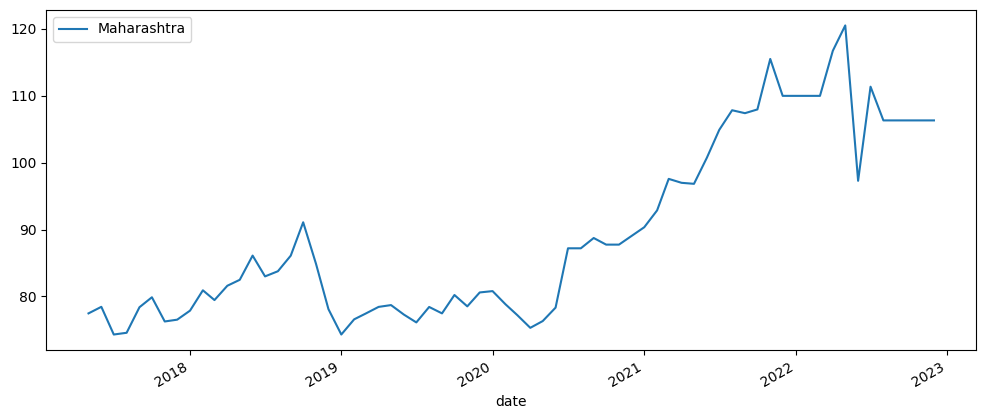

In [17]:
df.plot(figsize=(12,5))

In [18]:
len(df)

67

In [19]:
train = df[:55]

In [20]:
test = df[55:]

In [21]:
len(test)

12

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(train)

MinMaxScaler()

In [26]:
train_scaled = scaler.transform(train)

In [27]:
test_scaled = scaler.transform(test)

In [28]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [29]:
n = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length=n, batch_size=1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [157]:
model = Sequential([
    LSTM(500, activation='relu', input_shape=(12,1),return_sequences=True),
    LSTM(500, activation='relu'),
    Dense(1)
])

In [158]:
model.compile(optimizer='adam', loss='mse')

In [175]:
model.fit(generator, epochs=120)

Epoch 1/120
43/43 [==============================] - 2s 55ms/step - loss: 0.0058
Epoch 2/120
43/43 [==============================] - 2s 53ms/step - loss: 0.0034
Epoch 3/120
43/43 [==============================] - 2s 53ms/step - loss: 0.0038
Epoch 4/120
43/43 [==============================] - 2s 52ms/step - loss: 0.0028
Epoch 5/120
43/43 [==============================] - 2s 54ms/step - loss: 0.0039
Epoch 6/120
43/43 [==============================] - 2s 49ms/step - loss: 0.0027
Epoch 7/120
43/43 [==============================] - 2s 48ms/step - loss: 0.0032
Epoch 8/120
43/43 [==============================] - 2s 49ms/step - loss: 0.0029
Epoch 9/120
43/43 [==============================] - 3s 62ms/step - loss: 0.0037
Epoch 10/120
43/43 [==============================] - 2s 49ms/step - loss: 0.0033
Epoch 11/120
43/43 [==============================] - 2s 48ms/step - loss: 0.0029
Epoch 12/120
43/43 [==============================] - 2s 51ms/step - loss: 0.0026
Epoch 13/120
43/43 [=====

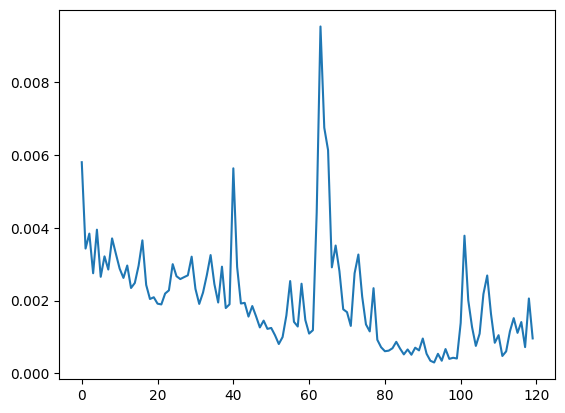

In [176]:
los = model.history.history['loss']
plt.plot(los)

In [177]:
last_trained_batch = train_scaled[-12:]

In [178]:
last_trained_batch.shape

(12, 1)

In [179]:
last_trained_batch = last_trained_batch.reshape((1,12,1))

In [180]:
model.predict(last_trained_batch)

1/1 [==============================] - 0s 21ms/step


array([[0.9677389]], dtype=float32)

In [181]:
test_pred = []

first_batch = train_scaled[-12:]
current_batch = first_batch.reshape((1,12,1))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_pred.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 34ms/step


In [182]:
test_pred

[array([0.9677389], dtype=float32),
 array([0.829828], dtype=float32),
 array([0.99508196], dtype=float32),
 array([1.0040942], dtype=float32),
 array([0.88001317], dtype=float32),
 array([0.9582257], dtype=float32),
 array([0.90610534], dtype=float32),
 array([0.7462231], dtype=float32),
 array([0.72205436], dtype=float32),
 array([0.85651904], dtype=float32),
 array([0.6255392], dtype=float32),
 array([0.4857511], dtype=float32)]

In [183]:
real_pred = scaler.inverse_transform(test_pred)

In [184]:
real_pred

array([[114.17084377],
       [108.48891459],
       [115.2973768 ],
       [115.66868281],
       [110.55654252],
       [113.77889996],
       [111.63153999],
       [105.04439139],
       [104.04863973],
       [109.58858459],
       [100.07221437],
       [ 94.31294501]])

In [185]:
test['Pred_price'] = real_pred

<ipython-input-185-7b1b1f2c470e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_price'] = real_pred


In [186]:
test.head(3)

,Maharashtra,Pred_price
date,,
2021-12-01,109.98,114.170844
2022-01-01,109.98,108.488915
2022-02-01,109.98,115.297377


<Axes: xlabel='date'>

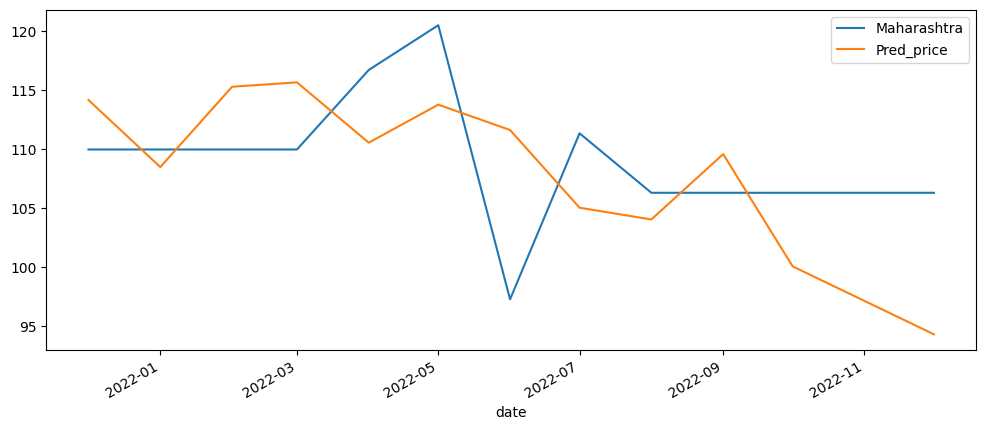

In [187]:
test.plot(figsize=(12,5))

In [188]:
from sklearn.metrics import mean_squared_error

In [189]:
rmse = np.sqrt(mean_squared_error(test['Maharashtra'], test['Pred_price']))

In [190]:
rmse

7.118916096057247